Need to predict if credit card defaults or not.

In [6]:
import os
import pandas as pd

In [7]:
data=pd.read_csv("credit_history.csv")

In [8]:
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [9]:
# to check if any column have missing values
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [10]:
data.years.describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [11]:
# to fill the missing values of years. Simple way to put fill median(==4) in all missing values
data['years'].fillna(4,inplace = True)

In [12]:
X=data.drop("default",axis=1)

In [13]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [14]:
X=pd.get_dummies(X) #one hot encoding

In [15]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [16]:
y = data['default']

In [17]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [23]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=200)

In [24]:
clf.score(X_test,y_test) # accuracy score

0.6274256144890039

In [26]:
## NEED TO CHCK THIS CODE##
# Area under the curve
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6721250820352787

Greater the 50% so better then naive classifier

In [36]:
# install Graphviz software
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [37]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [39]:
from IPython.display import Image

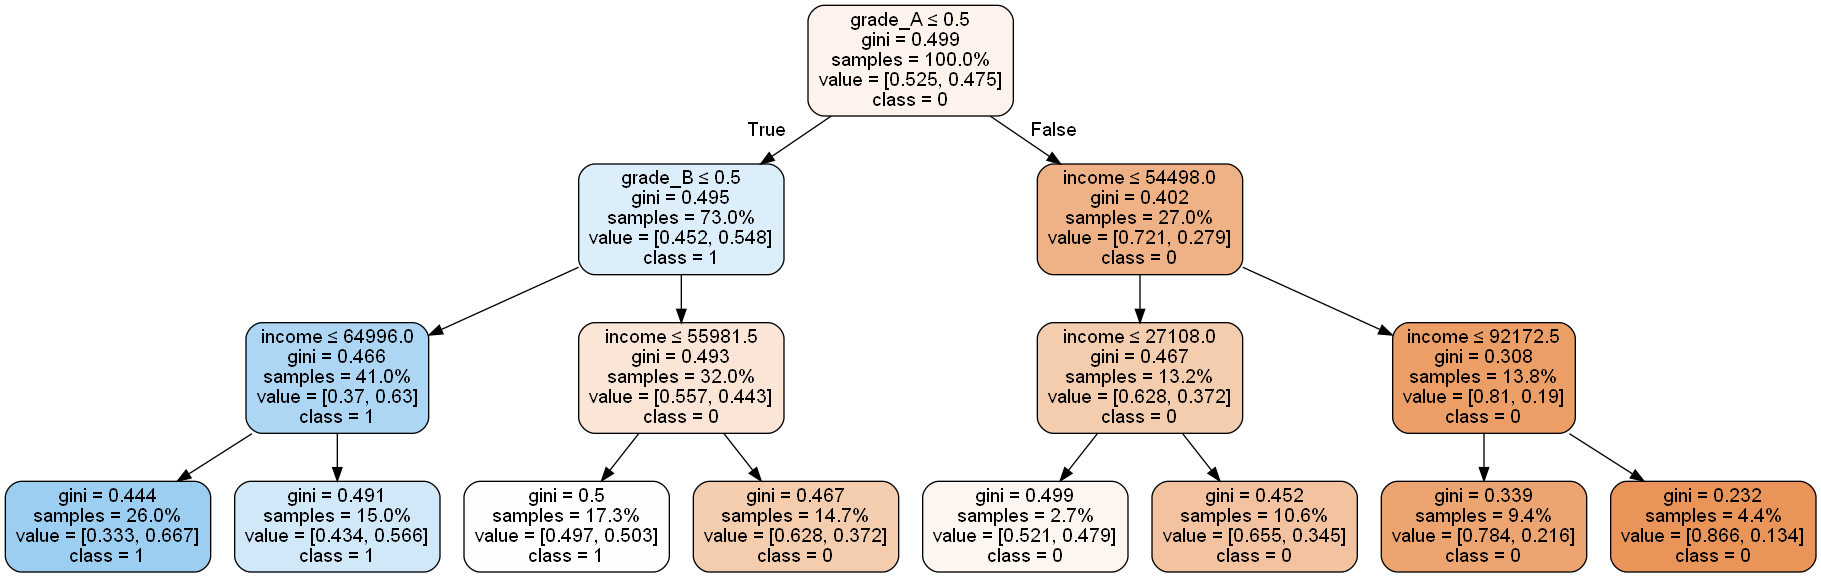

In [35]:
Image(graph.create_png())

# Grid Search-Cross Validation

In [43]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [44]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [45]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=200)

Max_Depth == 2 will give high score

In [47]:
mod.best_score_

0.6314528049645112